In [5]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

Accuracy: 0.951048951048951
Precision: 0.9659090909090909
Recall: 0.9550561797752809
F1 Score: 0.96045197740113


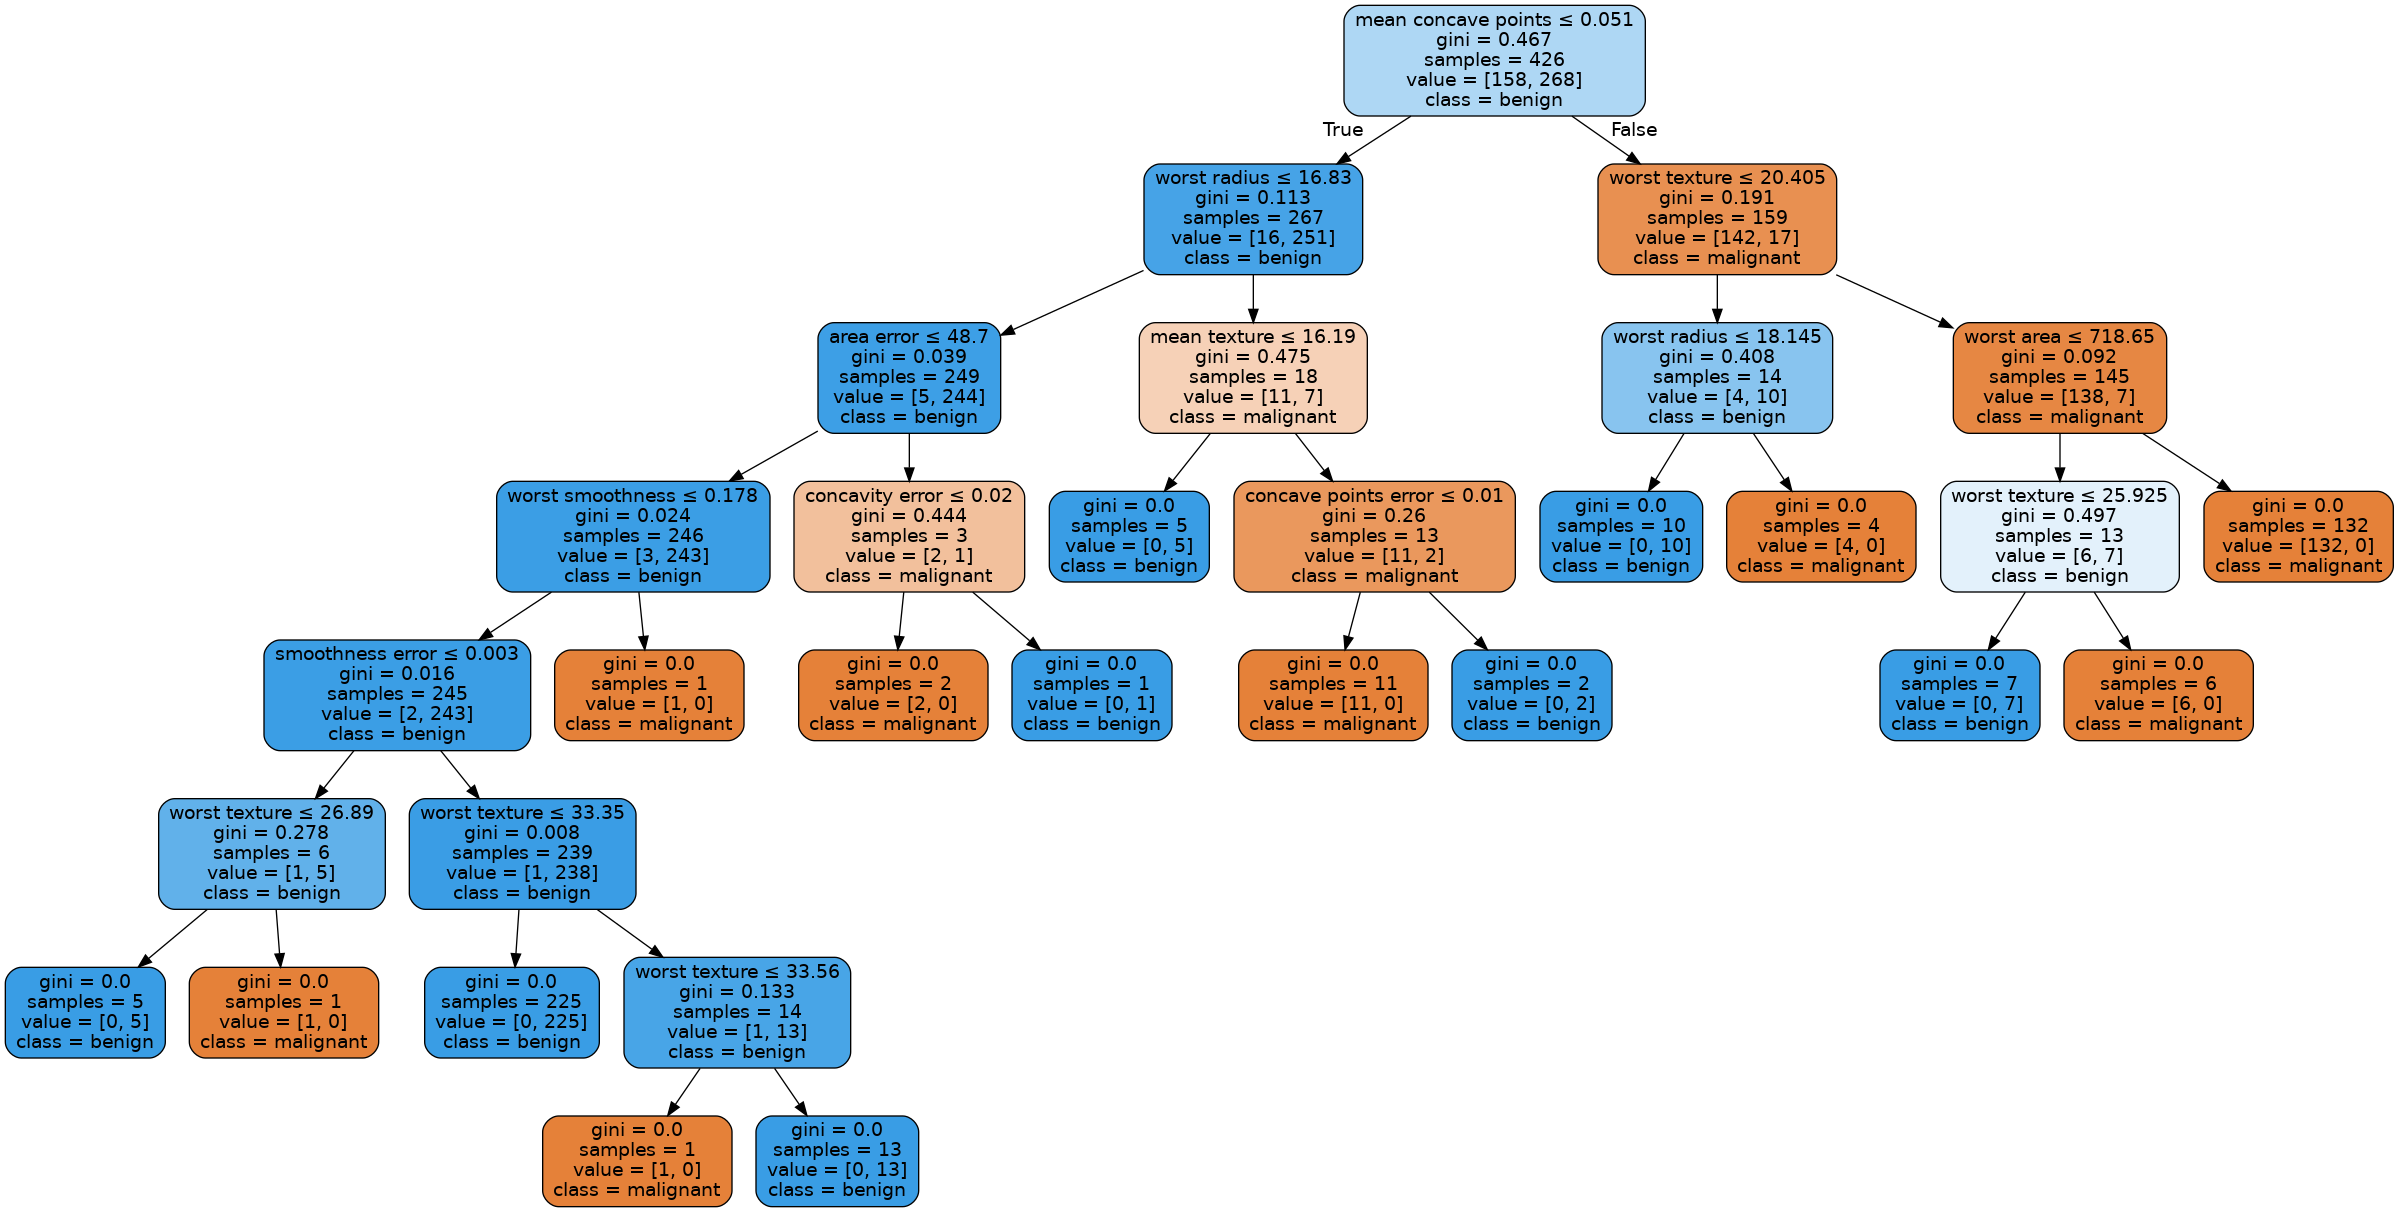

In [6]:
# Train a Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot the tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

tree = dtc
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Accuracy: 0.965034965034965
Precision: 0.9666666666666667
Recall: 0.9775280898876404
F1 Score: 0.9720670391061451


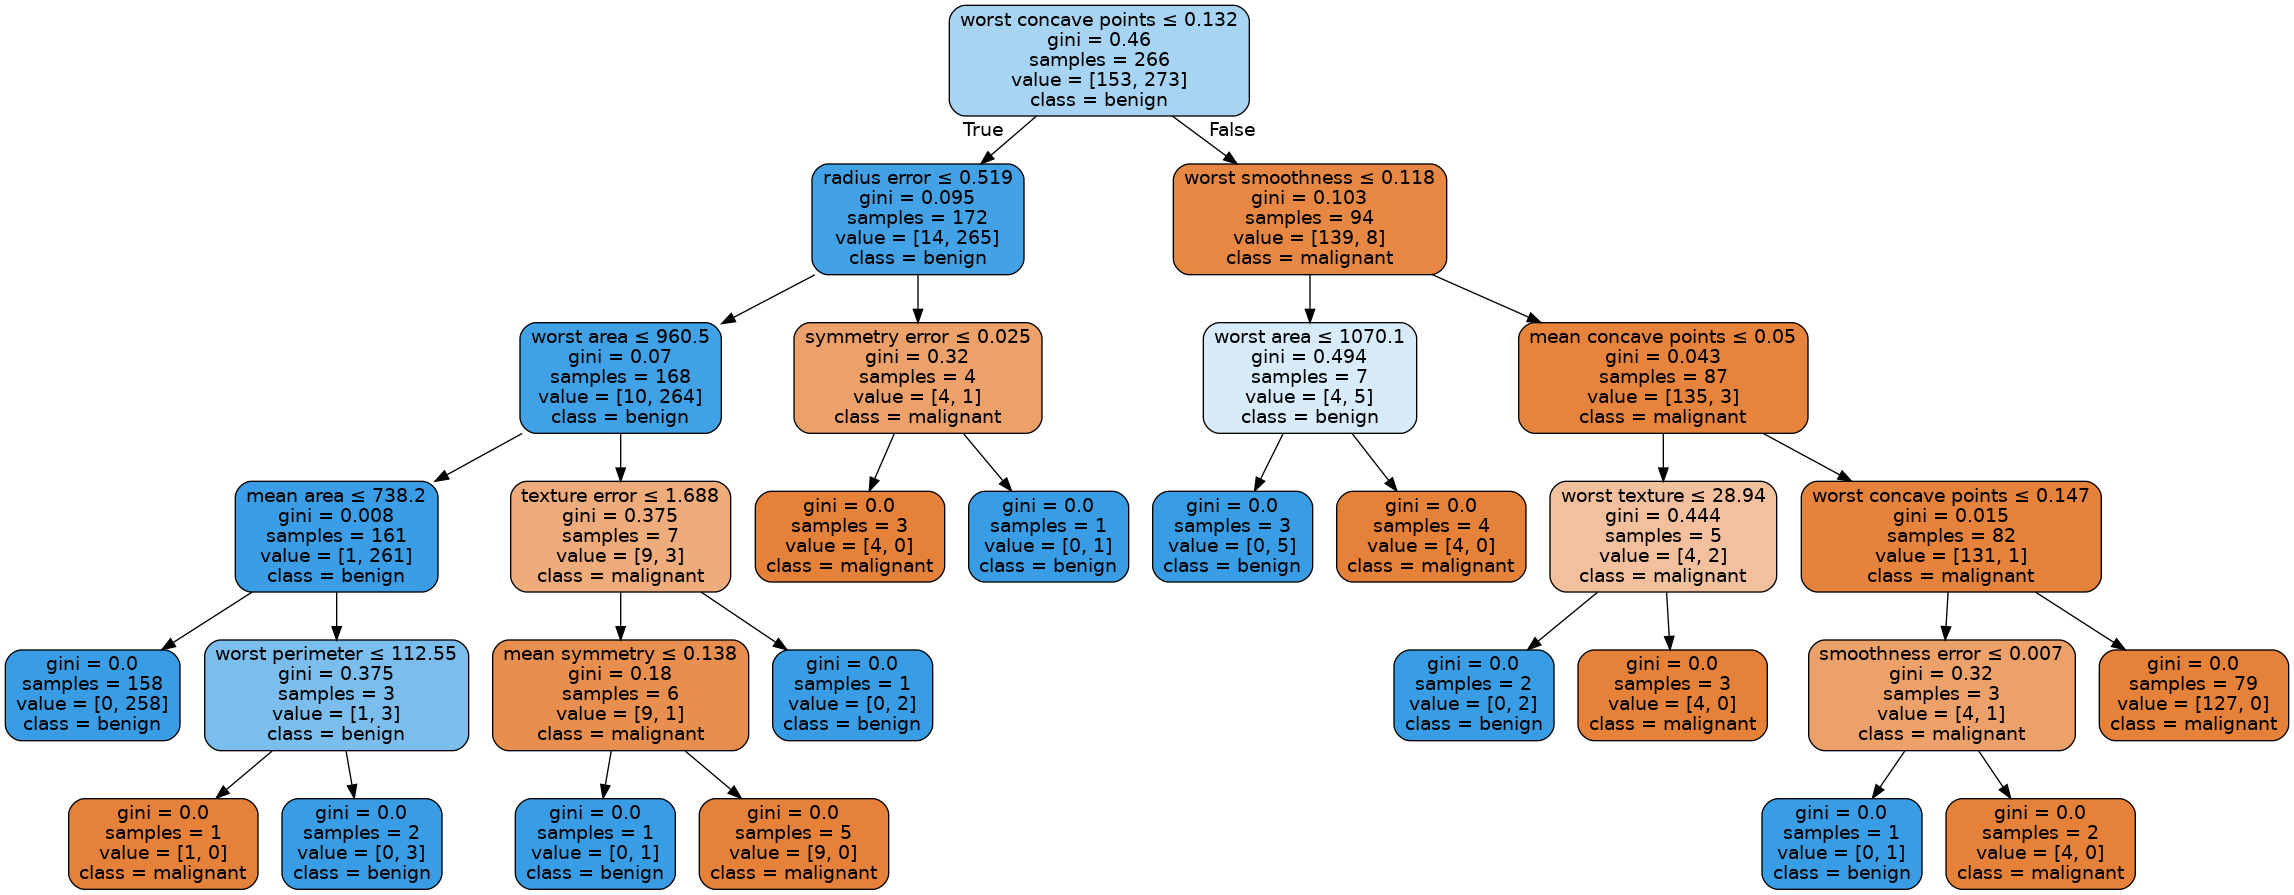

In [7]:
# Train a Random Forest model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot the tree
tree = rfc.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=300; total time=   1.3s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.3s
[CV] END ......................max_depth=5, n_e

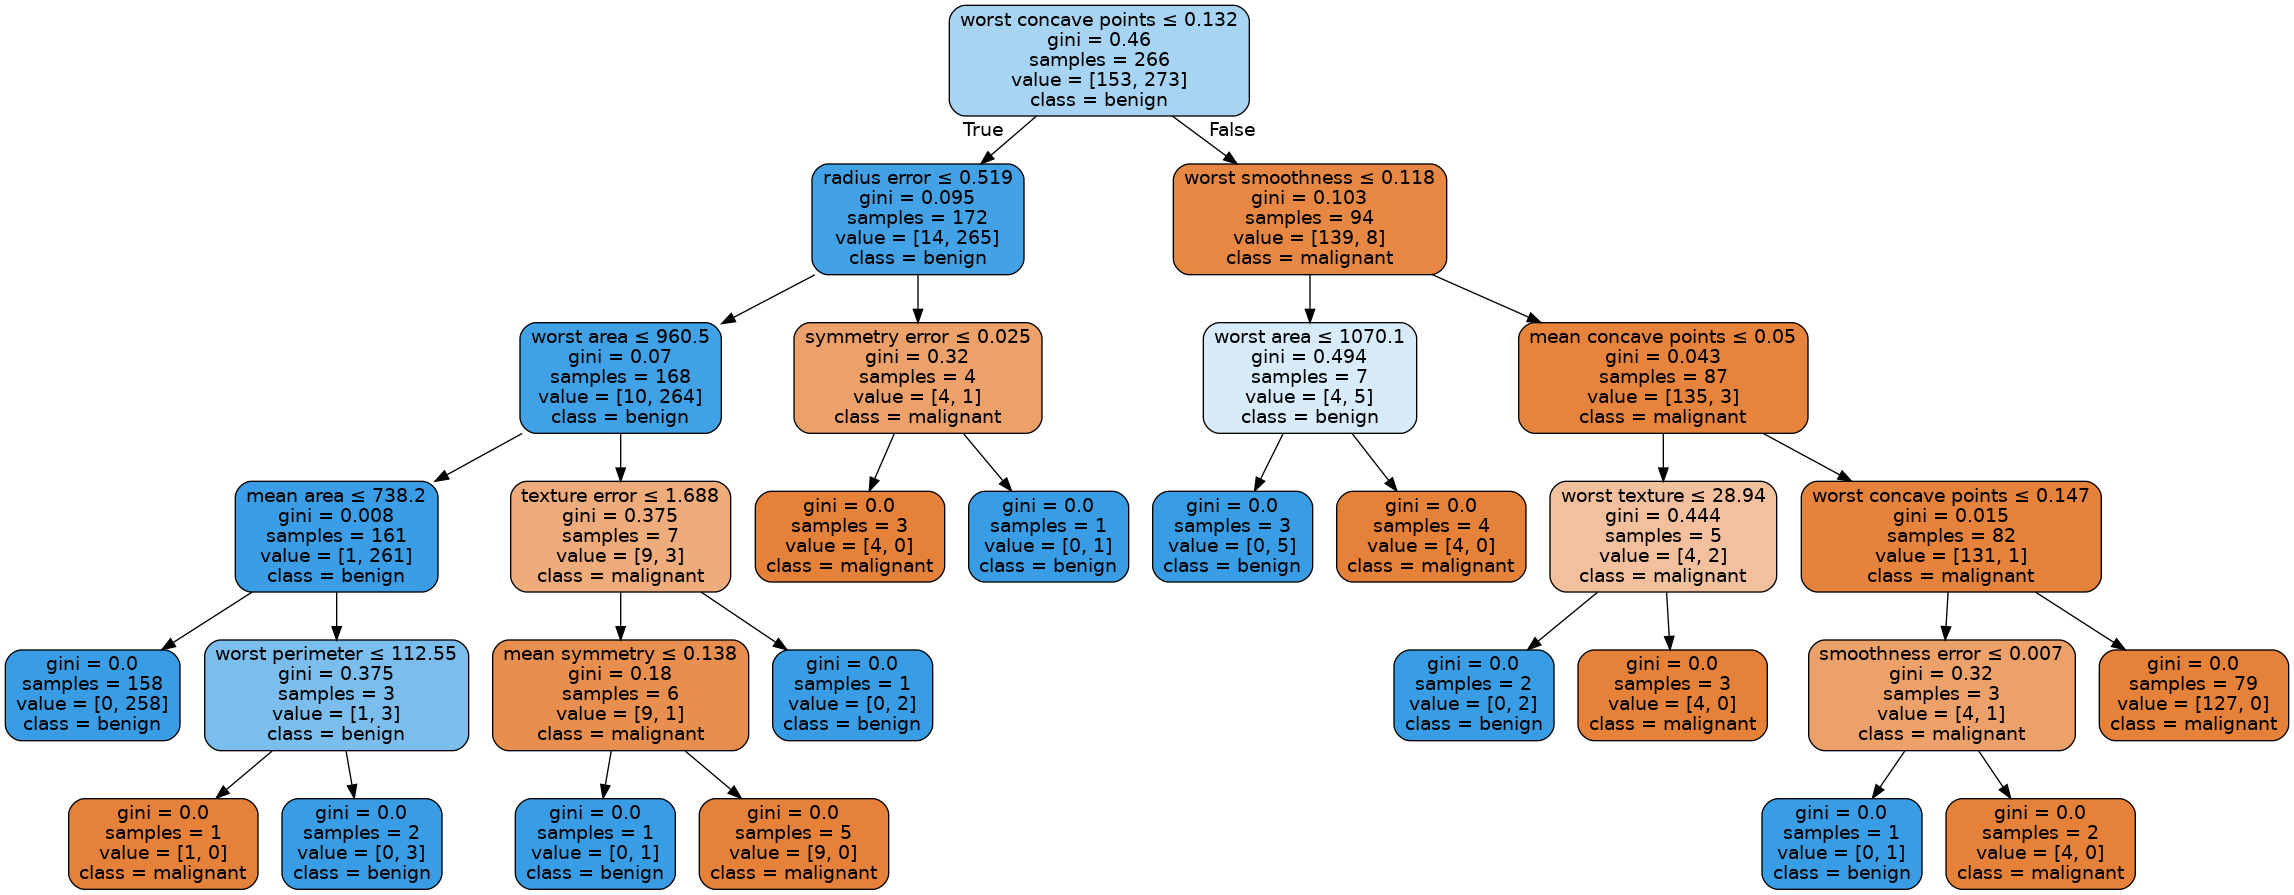

In [9]:
# Define the grid of hyperparameters to search
# Find the best hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25, None]
}

rf_grid = GridSearchCV(rfc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f'Best parameters: {rf_grid.best_params_}')
print(f'Best score: {rf_grid.best_score_:.3f}')

# Train a Random Forest model with the best hyperparameters
rfc = RandomForestClassifier(random_state=42, **rf_grid.best_params_)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot the tree
tree = rfc.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())